In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
import pickle
import os
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
import torch.nn as nn

from torch.utils.data import DataLoader
from torch.utils.data.dataset import TensorDataset

In [11]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *

## Dataset

In [12]:
def generate_data(size):
    x = np.random.uniform(size=(size, 1))
    y = x * 2.0
    return x.astype(np.float32), y.astype(np.float32)

x_train, y_train = generate_data(10000)
x_valid, y_valid = generate_data(1000)

## Model

In [13]:
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)

        return x

## Training

In [14]:
x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train.shape, y_train.min(), y_train.max()

(torch.Size([10000, 1]), tensor(0.0002), tensor(1.9999))

In [15]:
bs=50
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [16]:
x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [17]:
model = SimpleModel().cuda()

In [18]:
model(x).shape

torch.Size([50, 1])

In [19]:
loss_func = nn.MSELoss()
learn = Learner(data, SimpleModel(), loss_func=loss_func)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


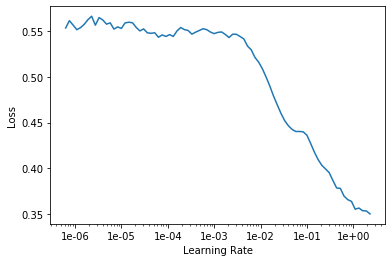

In [20]:
learn.lr_find()
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(1, 1e-1)

epoch,train_loss,valid_loss,time
0,0.003758,0.000001,00:11


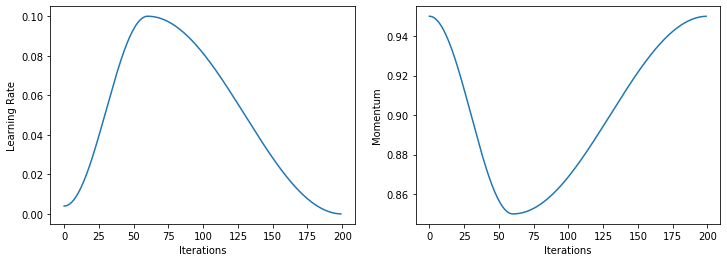

In [22]:
learn.recorder.plot_lr(show_moms=True)

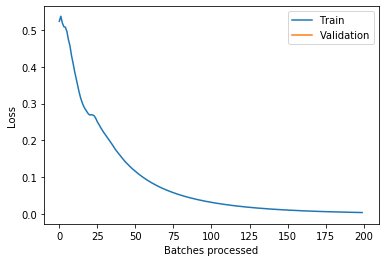

In [23]:
learn.recorder.plot_losses()